In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\oiim_2.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,4.95,5.12,4.92,5.10,5.10,436100
1,2008-08-11,5.15,5.31,5.10,5.20,5.20,325800
2,2008-08-12,5.25,5.28,5.02,5.16,5.16,276600
3,2008-08-13,5.20,5.24,5.04,5.23,5.23,260400
4,2008-08-14,5.23,5.36,5.20,5.33,5.33,256500
...,...,...,...,...,...,...,...
2903,2020-02-21,1.53,1.58,1.51,1.51,1.51,6800
2904,2020-02-24,1.50,1.54,1.45,1.54,1.54,38200
2905,2020-02-25,1.52,1.52,1.45,1.45,1.45,50100
2906,2020-02-26,1.48,1.50,1.45,1.45,1.45,38200


In [3]:
data_training = data[data['Date'] < '2019-10-31'].copy()
data_testing = data[data['Date'] >= '2019-10-31'].copy()

In [4]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [5]:
data_training.shape

(2827, 5)

In [6]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.47969543, 0.49428208, 0.49867374, 0.51719577, 0.25549241],
       [0.50507614, 0.5184244 , 0.52254642, 0.53042328, 0.19087234],
       [0.5177665 , 0.51461245, 0.51193634, 0.52513228, 0.16204816],
       ...,
       [0.00888325, 0.01143583, 0.01061008, 0.00793651, 0.02566055],
       [0.01142132, 0.01016518, 0.01061008, 0.01322751, 0.01575956],
       [0.01649746, 0.00889454, 0.00530504, 0.00925926, 0.05260999]])

In [7]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train.shape

(2727, 100, 5)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 110, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           21280     
_________________________________________________________________
dropout (Dropout)            (None, 100, 70)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 90)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 110)          88440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 110)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               1

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
86/86 [==============================] - 27s 313ms/step - loss: 0.0118
Epoch 2/125
86/86 [==============================] - 28s 322ms/step - loss: 0.0027
Epoch 3/125
86/86 [==============================] - 29s 341ms/step - loss: 0.0023
Epoch 4/125
86/86 [==============================] - 29s 341ms/step - loss: 0.0023
Epoch 5/125
86/86 [==============================] - 29s 340ms/step - loss: 0.0020
Epoch 6/125
86/86 [==============================] - 29s 341ms/step - loss: 0.0020
Epoch 7/125
86/86 [==============================] - 29s 332ms/step - loss: 0.0020
Epoch 8/125
86/86 [==============================] - 29s 338ms/step - loss: 0.0021
Epoch 9/125
86/86 [==============================] - 32s 369ms/step - loss: 0.0017
Epoch 10/125
86/86 [==============================] - 34s 394ms/step - loss: 0.0017
Epoch 11/125
86/86 [==============================] - 32s 374ms/step - loss: 0.0016
Epoch 12/125
86/86 [==============================] - 28s 331ms/step - loss: 0.0015
E

In [13]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2827,2019-10-31,1.29,1.30,1.24,1.24,1.24,11400
2828,2019-11-01,1.31,1.70,1.31,1.62,1.62,424000
2829,2019-11-04,1.73,1.75,1.55,1.59,1.59,133800
2830,2019-11-05,1.61,1.63,1.56,1.63,1.63,79100
2831,2019-11-06,1.63,1.64,1.48,1.55,1.55,107700


In [14]:
past_60_days = data_testing.tail(60)

In [15]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.71,1.75,1.68,1.70,62100
1,1.73,1.80,1.70,1.74,61300
2,1.77,1.77,1.71,1.77,23200
3,1.78,1.80,1.73,1.76,31700
4,1.76,1.76,1.73,1.74,27100


In [16]:
inputs = scaler.transform(df)
inputs

array([[0.06852792, 0.0660737 , 0.06896552, 0.06746032, 0.03638174],
       [0.07106599, 0.07242694, 0.07161804, 0.07275132, 0.03591306],
       [0.07614213, 0.06861499, 0.0729443 , 0.07671958, 0.01359189],
       [0.07741117, 0.07242694, 0.07559682, 0.07539683, 0.01857168],
       [0.0748731 , 0.06734435, 0.07559682, 0.07275132, 0.01587674],
       [0.07360406, 0.0660737 , 0.0729443 , 0.07142857, 0.0316363 ],
       [0.07233503, 0.07242694, 0.07559682, 0.07142857, 0.03743629],
       [0.07360406, 0.06861499, 0.0729443 , 0.07010582, 0.07211905],
       [0.07106599, 0.07496823, 0.0729443 , 0.07275132, 0.05155545],
       [0.07360406, 0.07369759, 0.07161804, 0.07275132, 0.05050091],
       [0.07106599, 0.06988564, 0.06366048, 0.06349206, 0.07938368],
       [0.06598985, 0.05972046, 0.05437666, 0.05291005, 0.04522819],
       [0.05456853, 0.05209657, 0.05702918, 0.05687831, 0.01540805],
       [0.05964467, 0.05209657, 0.06100796, 0.05820106, 0.01898178],
       [0.06218274, 0.05463787, 0.

In [17]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((81, 60, 5), (81,))

In [18]:
x_test.shape

(81, 60, 5)

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
scaler.scale_

array([1.26903553e-01, 1.27064803e-01, 1.32625995e-01, 1.32275132e-01,
       5.85857402e-07])

In [21]:
scale = 1 / 1.26903553e-01
scale

7.8800000185967995

In [22]:
y_pred = y_pred * scale 
y_test = y_test * scale

In [23]:
y_pred.shape

(81, 1)

In [24]:
y_test.shape

(81,)

In [28]:
y_pred[30:]

array([[0.8016563 ],
       [0.8059006 ],
       [0.7932106 ],
       [0.7580747 ],
       [0.7225136 ],
       [0.6966501 ],
       [0.67948025],
       [0.6670407 ],
       [0.6634152 ],
       [0.65988964],
       [0.67064035],
       [0.69346064],
       [0.72551394],
       [0.75875527],
       [0.7804857 ],
       [0.7846321 ],
       [0.777999  ],
       [0.75661385],
       [0.73848325],
       [0.7298988 ],
       [0.72415787],
       [0.71399695],
       [0.69857496],
       [0.684086  ],
       [0.67579925],
       [0.6698471 ],
       [0.6672578 ],
       [0.6686415 ],
       [0.6791988 ],
       [0.6864075 ],
       [0.68421656],
       [0.6777497 ],
       [0.6539447 ],
       [0.6249379 ],
       [0.59475964],
       [0.577944  ],
       [0.5671843 ],
       [0.5883321 ],
       [0.62142277],
       [0.65231115],
       [0.6774806 ],
       [0.6948192 ],
       [0.6954122 ],
       [0.6897018 ],
       [0.67611134],
       [0.65064245],
       [0.624751  ],
       [0.599

In [29]:
y_test[30:]

array([0.58, 0.56, 0.52, 0.43, 0.47, 0.49, 0.48, 0.46, 0.47, 0.45, 0.53,
       0.55, 0.61, 0.53, 0.53, 0.54, 0.52, 0.46, 0.55, 0.51, 0.49, 0.44,
       0.45, 0.48, 0.47, 0.44, 0.46, 0.47, 0.51, 0.46, 0.43, 0.41, 0.35,
       0.35, 0.35, 0.41, 0.47, 0.51, 0.46, 0.46, 0.51, 0.48, 0.45, 0.47,
       0.38, 0.36, 0.36, 0.33, 0.35, 0.31, 0.27])

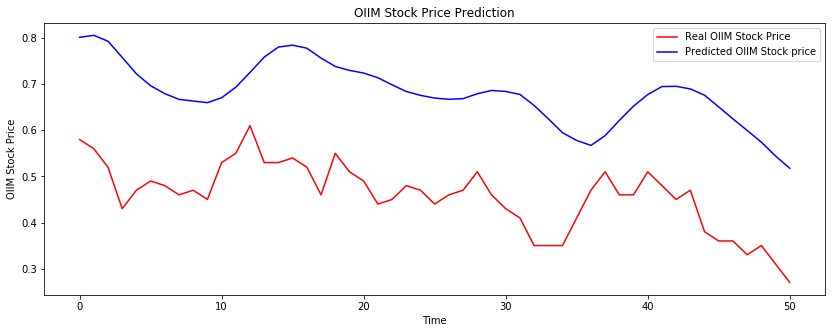

In [30]:
plt.figure(figsize = (14,5))
plt.plot(y_test[30:], color = 'red', label = 'Real OIIM Stock Price')
plt.plot(y_pred[30:], color = 'blue', label = 'Predicted OIIM Stock price')
plt.title('OIIM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('OIIM Stock Price')
plt.legend()
plt.show()